In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/audio/raw_wavlm.pt')

In [3]:
train_loader, test_loader = train_test_dataloader(embs)

In [4]:
model = MLP(input_dim = 1024, hidden_dims = [1024], output_dim = 6, dropout = 0.3).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
results = train_model(**PARAMS)

Epoch 5/50
Train Loss: 0.8854,                    Train Accuracy: 0.6799,                    Train Precision: 0.6782,                    Train Recall 0.6799.
Val Loss: 0.8495,                    Val Accuracy: 0.6991,                    Val Precision: 0.7002,                    Val Recall: 0.6991.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.7375,                    Train Accuracy: 0.7362,                    Train Precision: 0.7356,                    Train Recall 0.7362.
Val Loss: 0.7397,                    Val Accuracy: 0.7381,                    Val Precision: 0.7352,                    Val Recall: 0.7381.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.6638,                    Train Accuracy: 0.7576,                    Train Precision: 0.7573,                    Train Recall 0.7576.
Val Loss: 0.6833,                    Val Accuracy: 0.7529,                    Val Precision: 0.7515,                    Val Recall: 0.7529.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.6127,                    Train Accuracy: 0.7745,                    Train Precision: 0.7752,                    Train Recall 0.7745.
Val Loss: 0.6812,                    Val Accuracy: 0.7502,                    Val Precision: 0.7587,                    Val Recall: 0.7502.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.5738,                    Train Accuracy: 0.7947,                    Train Precision: 0.7953,                    Train Recall 0.7947.
Val Loss: 0.6521,                    Val Accuracy: 0.7710,                    Val Precision: 0.7734,                    Val Recall: 0.7710.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.5405,                    Train Accuracy: 0.8066,                    Train Precision: 0.8065,                    Train Recall 0.8066.
Val Loss: 0.6342,                    Val Accuracy: 0.7649,                    Val Precision: 0.7710,                    Val Recall: 0.7649.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.5117,                    Train Accuracy: 0.8123,                    Train Precision: 0.8124,                    Train Recall 0.8123.
Val Loss: 0.6184,                    Val Accuracy: 0.7851,                    Val Precision: 0.7857,                    Val Recall: 0.7851.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.4836,                    Train Accuracy: 0.8199,                    Train Precision: 0.8199,                    Train Recall 0.8199.
Val Loss: 0.6161,                    Val Accuracy: 0.7737,                    Val Precision: 0.7763,                    Val Recall: 0.7737.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.4573,                    Train Accuracy: 0.8315,                    Train Precision: 0.8322,                    Train Recall 0.8315.
Val Loss: 0.6137,                    Val Accuracy: 0.7797,                    Val Precision: 0.7817,                    Val Recall: 0.7797.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.4361,                    Train Accuracy: 0.8359,                    Train Precision: 0.8358,                    Train Recall 0.8359.
Val Loss: 0.6017,                    Val Accuracy: 0.7811,                    Val Precision: 0.7806,                    Val Recall: 0.7811.
--------------------------------------------------
BEST EPOCH: 41.00          BEST ACCURACY: 0.79          BEST PRECISION: 0.79          BEST RECALL: 0.79


In [6]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

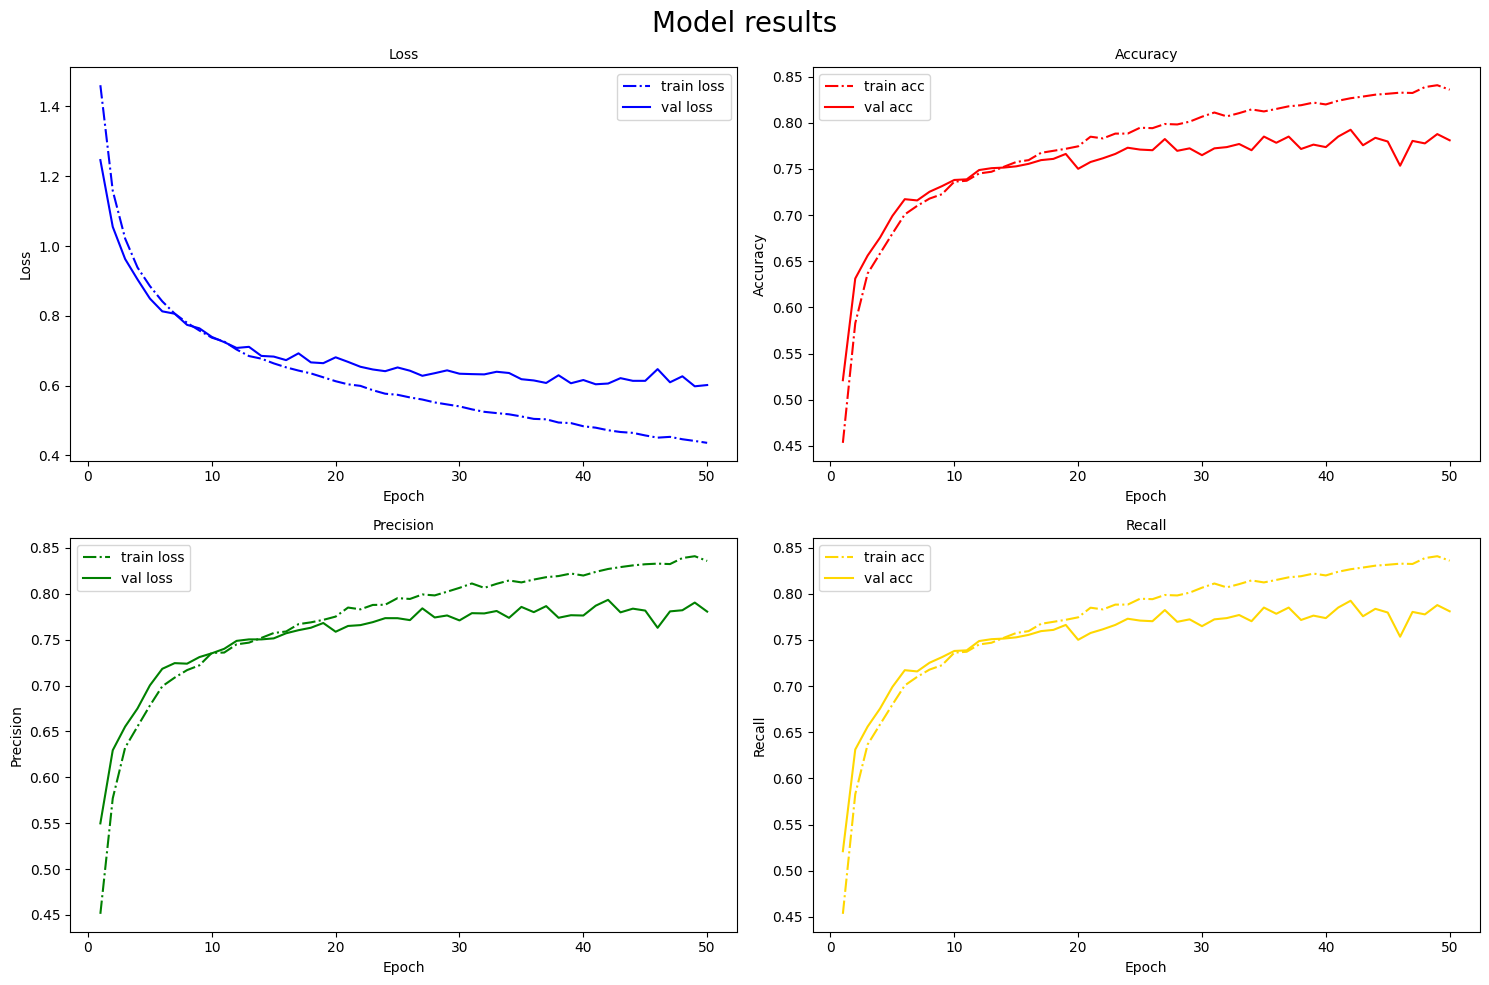

In [ ]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

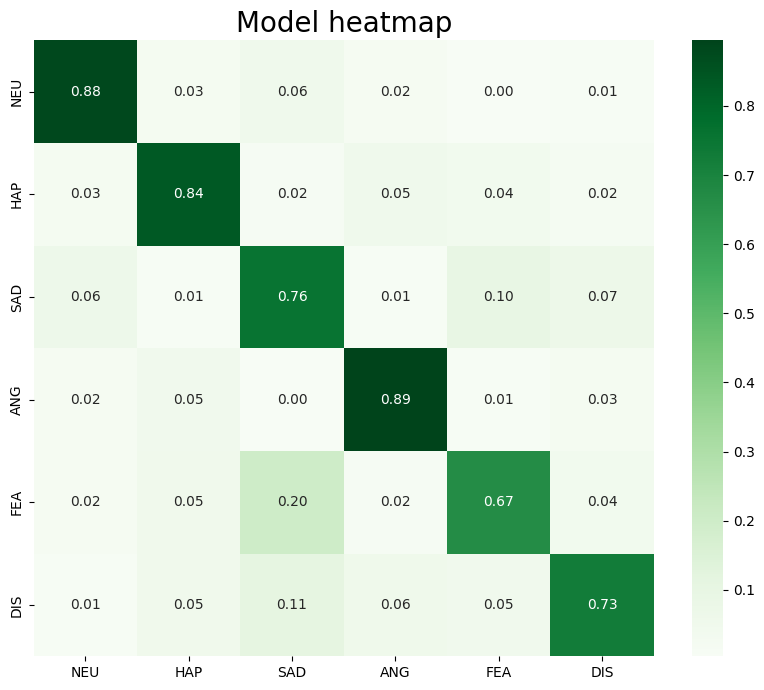

In [ ]:
plot_confusion_matrix(cm)